# Image denoising using non-local means algorithm

## Utils

In [1]:
def show_gray(img,title=""):
  """
  Function to show grayscale image
  """
  plt.imshow(img,cmap='gray')
  plt.title(title)

## Download the Dataset

In [2]:
#taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

file_id = '1Z73UHw9IS492qxHvNUiB7-DidVl_ePfg'
destination = '/content/dataset.zip'
download_file_from_google_drive(file_id, destination)

In [3]:
!unzip -q dataset.zip
!rm -rf dataset.zip

# MSE and PSNR
Calculating mean square error and peak signal to noise ratio


In [ ]:
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
from math import sqrt, log10

def MSE(image1,image2):
  """ 
  Mean Squared Error
  :param image1: image1
  :param image2: image2
  :rtype: float
  :return: MSE value
  """

  # saving images as numpy arrays
  img1 = np.array(image1) 
  img2 = np.array(image2)

  # square of difference between image pixels
  diffsq = (img1 -img2) ** 2
  # summing the vectors
  summ = np.sum(diffsq)
  #print(img1.shape)

  # multiplying by 3 because 3 channels
  pix = img1.shape[0] * img1.shape[1] * 3 
  # Note: image1 and 2 should have same shape
  
  # applying mean square error formula
  mse = summ / pix

  return mse

def PSNR(image1, image2, peak=255):
  """ 
  Peak signal-to-noise ratio
  :param image1: image1
  :param image2: image2
  :param peak: max value of pixel 8-bit image (255)
  :rtype: float
  :return: PSNR value
  """


  # assigning new variable to peak pixel value
  maxpix = peak
  # calling mean square error
  mse = MSE(image1, image2)
  # chacking if mse is not equal to zero, as divide by zero is not possible
  if mse!=0:
    # psnr formula
    psnr = 20 * log10(maxpix / sqrt(mse))
  else:
    # can't divide by zero, returning no mse and 0
    print("no mse")
    psnr = 0

  return psnr


In [ ]:
#@title Grader { vertical-output: true }
seed =  200#@param {type:"integer"}
# Grader, please don't touch [Can run to check] [seed will be changed later]
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

np.random.seed(seed)
image1 = np.random.randint(0,256,(1280,720,3))
image2 = np.random.randint(0,256,(1280,720,3))

print(f"Skimage -> PSNR: {peak_signal_noise_ratio(image1,image2,data_range=255):.4f} | MSR: {mean_squared_error(image1,image2):.4f}")
print(f"My Func -> PSNR: {PSNR(image1,image2):.4f} | MSR: {MSE(image1,image2):.4f}")

Skimage -> PSNR: 7.7475 | MSR: 10922.7525
My Func -> PSNR: 7.7475 | MSR: 10922.7525


# Creating Noisy Images


## Salt n Pepper Noise
you can read about this more [here](https://en.wikipedia.org/wiki/Salt-and-pepper_noise).

## Gaussian Noise
you can read about this more [here](https://en.wikipedia.org/wiki/Gaussian_noise). 

In [ ]:
from skimage.util import random_noise
import numpy as np
import random
import cv2

class noisy_system():
  def example(self,img,**kwargs):
    """
    An example function to test expected return.
    You can read more about skimage.util.random_noise at https://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise
    """
    noisy_image = random_noise(img,**kwargs)
    noisy_image = np.uint8(noisy_image*255)
    return noisy_image

  def create_salt_and_pepper_noise(self,img,amount=0.05):
    """
    function to create salt and pepper noise
    :param image: input image
    :rtype: uint8 (w,h)
    :return: noisy image
    
    """  

    #with inbuilt functions
    #image = random_noise(img,mode="s&p", seed=None, clip=True, amount=amount)
    #image = np.uint8(image*255)     

    #Dimensions of the image
    h, w = img.shape
      
    # Need : proportion of image pixels to replace with noise on range [0, 1] = 0.05
    # number of pixels total = width*height

    # calculating number of pixels to apply salt and pepper noise to
    # amount is the proportion, therefore, multiplyling total number of pixels by amount
    number_of_pixels = int((w*h)*(amount))

    # Colouring pixels white
    for i in range(number_of_pixels):
        # random y coordinate
        y_coord=random.randint(0, h - 1)
        # random x coordinate
        x_coord=random.randint(0, w - 1)
        # pixel chnage to white
        img[y_coord][x_coord] = 255
          
    # Colouring pixels black
    for i in range(number_of_pixels):
        # random y coordinate
        y_coord=random.randint(0, h - 1)
        # random x coordinate
        x_coord=random.randint(0, w - 1)
        # pixel change to black
        img[y_coord][x_coord] = 0
          
    return img

  def create_gaussian_noise(self,img,mean=0,var=0.01):
    """
    function to create gaussian noise
    :param image: input image
    :rtype: uint8 (w,h)
    :return: noisy image
    """
 

    #with inbuilt functions
    #image = random_noise(img,mode="gaussian", seed=None, clip=True, mean=0, var=0.01)
    #image = np.uint8(image*255)

    h, w = img.shape
   
    '''
    # alternate method using numpy
    gaussian = np.random.normal(mean,np.sqrt(var)*255,(h,w))
    gauss_noise = gaussian.reshape(h,w)
    img = img + gauss_noise
    '''

    # Alternate method
    # creating zeros array of size same as inout image
    noise = np.zeros_like(img)
    # introducing gaussian distributed noise
    noise = cv2.randn(noise, mean, np.sqrt(var)*255)
    img = cv2.add(img, noise)
    

    return img


In [ ]:
# Added for checking
from skimage.metrics import mean_squared_error as MSE
from skimage.metrics import peak_signal_noise_ratio

def PSNR(image1,image2):
  return peak_signal_noise_ratio(image1,image2,data_range=255)

Total Time taken: 0.07s

Statistics:
Example   => SNP -> PSNR: 17.99 | MSE: 1034.13
Example   => GSN -> PSNR: 20.48 | MSE: 582.40
My Func   => SNP -> PSNR: 15.17 | MSE: 1975.55
My Func   => GSN -> PSNR: 23.07 | MSE: 320.74


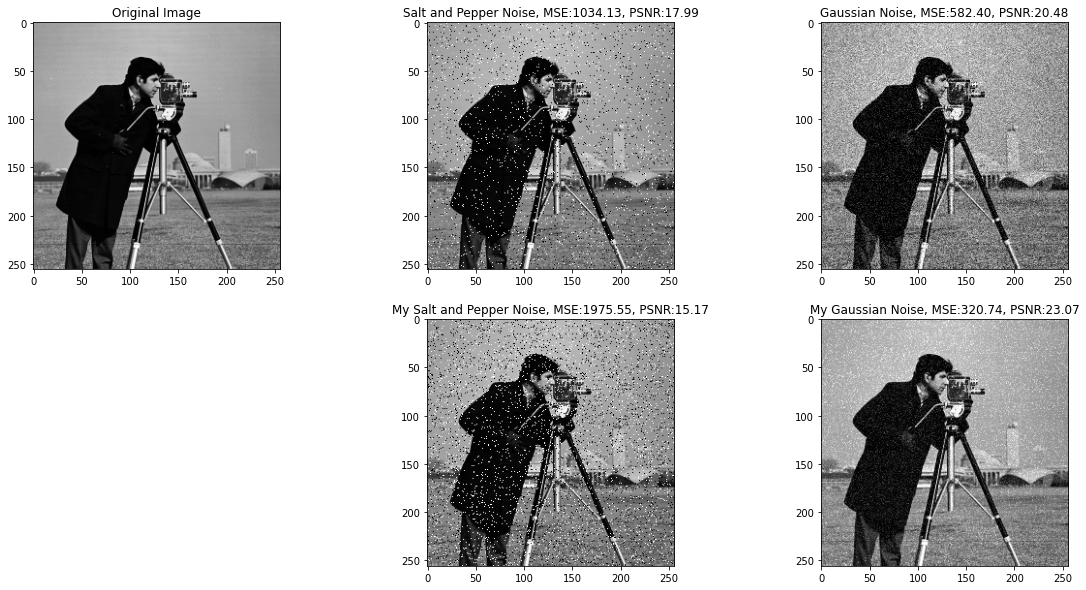

In [ ]:
#@title Grader { vertical-output: true, display-mode: "form" }
image_number = 3 #@param {type:"slider", min:1, max:10, step:1}
# Grader, please don't touch [Can run to check] [will be graded on an image decided later]
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

clear_output(wait=True)

start = time.time()

noise_maker               = noisy_system()
image                     = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                     = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

salt_and_pepper_example   = noise_maker.example(image.copy(),mode="s&p")
gaussian_example          = noise_maker.example(image.copy(),mode="gaussian")
salt_and_pepper_image     = noise_maker.create_salt_and_pepper_noise(image.copy())
gaussian_image            = noise_maker.create_gaussian_noise(image.copy())

end = time.time()
print(f"Total Time taken: {end-start:.2f}s\n")
print("Statistics:")
print(f"Example   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Example   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"My Func   => SNP -> PSNR: {PSNR(salt_and_pepper_image,image):.2f} | MSE: {MSE(salt_and_pepper_image,image):.2f}")
print(f"My Func   => GSN -> PSNR: {PSNR(gaussian_image,image):.2f} | MSE: {MSE(gaussian_image,image):.2f}")


plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
show_gray(image,"Original Image")
plt.subplot(2,3,2)
show_gray(salt_and_pepper_example,
          f"Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_example):.2f}, PSNR:{PSNR(image,salt_and_pepper_example):.2f}")
plt.subplot(2,3,3)
show_gray(gaussian_example,
          f"Gaussian Noise, MSE:{MSE(image,gaussian_example):.2f}, PSNR:{PSNR(image,gaussian_example):.2f}")
plt.subplot(2,3,5)
show_gray(salt_and_pepper_image,
          f"My Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_image):.2f}, PSNR:{PSNR(image,salt_and_pepper_image):.2f}")
plt.subplot(2,3,6)
show_gray(gaussian_image,
          f"My Gaussian Noise, MSE:{MSE(image,gaussian_image):.2f}, PSNR:{PSNR(image,gaussian_image):.2f}")
plt.show()

# Non Local Means

***Primary Objective:*** To complete Non Local Means denoiser. 

***Secondary Objective:*** 
1. To optimise for **MSE**. 
2. To optimise for **time**.  

In [ ]:
class NLMeans():
  """

  """
  def example(self,img,**kwargs):
    denoised_image = cv2.fastNlMeansDenoising(img,**kwargs)
    return denoised_image

  def solve(self,img,h=10,small_window=7,big_window=21):
    """
    Solve function to perform nlmeans filtering.

    :param img: noisy image
    :param h: sigma h (as mentioned in the paper)
    :param small_window: size of small window
    :param big_window: size of big window
    :rtype: uint8 (w,h)
    :return: solved image
    """
    
    # METHOD 1: USING FOR LOOPS
    #'''
    # setting shorter variable names
    sw = small_window 
    bw = big_window 
    
    # adding padding
    pad_width = bw//2
    pad = np.pad(img, bw, mode='edge')
    pad_op = np.zeros_like(pad)

    # dimensions of the image
    h, w = img.shape

    # dimensions of padded image
    h_pad, w_pad = pad.shape


    for aX in range(pad_width, pad_width+w, 1):
      for aY in range(pad_width, pad_width+h, 1):

        # selecting neighbourhood for comaparision
        nbd = pad[aY- sw//2: 1 + aY + sw//2, aX-sw//2: 1 + aX + sw//2]

        # borderless window
        win_X = aX - pad_width
        win_Y = aY - pad_width

        # initialising variables that are used in next loop
        tot_weight = 0
        pix_clr = 0

        # computing weights inside comparision neighbourhood
        for pX in range(win_X, win_X + (bw-sw), 1):
          for pY in range(win_Y, win_Y + (bw-sw), 1):

            # extracting small square
            ss = pad[pY: pY + sw, pX:  pX + sw]

            # computing euclidean distance
            ed = np.sqrt(np.sum(np.square(ss - nbd)))

            # putting in weights formula
            weight = np.exp(-ed/h*h)

            # summing to find total weight
            tot_weight = tot_weight + weight

            # assigning colour to pixel according to formula
            pix_clr = pix_clr + weight*(pad[pY + sw//2, pX + sw//2])
            
      # dividing by totoal weight
        pix_clr = pix_clr/tot_weight

      # putting colours
        pad_op[aY, aX] = pix_clr

      output = pad_op[pad_width:pad_width+h, pad_width:pad_width+w] # selecting pixels for op


    return output
    # NOTE: This algorithm takes >4 mins to run. (Below is the optimised version using vectors (referenced from the internet). Please wait for ~4 mins) 
            #Image 7 takes the least amount of time
            # RUN METHOD 2 FOR OPTIMISATION IN TIME
  
    '''#--------------------------------------UNCOMMENT THIS FOLLOWING BLOCK FOR METHOD 2------------------------------------------------------>

    # METHOD 2: VECTORISING THE FOR LOOPS
    
    # setting shorter variable names
    sw = small_window 
    bw = big_window 
    
    # adding padding
    pad = np.pad(img, bw+sw, mode='edge')

    # op array like padded image, with zeros only
    pad_op = np.zeros_like(img)

    # dimensions of the image
    h, w = img.shape

    # dimensions of padded image
    h_pad, w_pad = pad.shape

    # initialising 4-d vector
    nbd = np.zeros((h+bw-1, w+bw-1, sw, sw))

    # initialising a pad included neighbourhood, getting smaller neighbourhoods
    for y in range(h+bw-1):
        for x in range(w+bw-1):
            nbd[y, x] = np.squeeze(NLMeans.small_window(pad[:, :, np.newaxis], x+(sw-1)//2, y+(sw-1)//2, sw))


    # running loop through every pixel along height and width of image
    for Y in range(h):
        for X in range(w):
            # getting new coordinates, accounting padding
            x = X + (bw-1)//2
            y = Y + (bw-1)//2
            # selecting smaller neighbourhoods for computing weights
            ss = NLMeans.small_window(np.reshape(nbd, (h+bw-1, w+bw-1, sw*sw)), x, y, bw)
            
            # getting neighbourhood for pixels
            ngbd = nbd[int(y), int(x)].flatten()

            # computing distance between neighbourhoods, used to compute weight later
            dist = ss-ngbd

            # computing weights using formula
            euclidean_dist = np.sqrt(np.sum(dist*dist, axis=2))
            weight = np.exp(-euclidean_dist/(h*h))

            # Summing weights
            total_weight = np.sum(weight)

            # Calculating average pixel value
            section = np.squeeze(NLMeans.small_window(pad[:, :, None], x+(sw-1)//2, y+(sw-1)//2, bw))
            colour = np.sum(weight*section)
            pad_op[Y, X] = colour/total_weight
            
    return pad_op

  def small_window(img, x, y, N):
    
    # Extracts a small window of input image, around the center (x,y)
    h, w, c = img.shape  # obtaining image dimensions
    N = int(N) # converting to integer, due to slicing limitations
    out = int(N//2)  # sectioning from center, distance half of small window size
    
    small_window = np.zeros((N, N, c))
    
    xmin = int(max(0, x-out))
    xmax = int(min(w, x+out+1))
    ymin = int(max(0, y-out))
    ymax = int(min(h, y+out+1))

    # setting required ranges and extracting pixel values from original image
    small_window[out - int(y-ymin):out + int(ymax-y), out - int(x-xmin):out + int(xmax-x)] = img[ymin:ymax, xmin:xmax]

    return small_window

    
    '''#--------------------------------------UNCOMMENT TILL HERE FOR METHOD 2--------------------------------------
    


# best salt_and_paper_h: 9 or 10
# best gaussian_h: 9 or 10

(Inbuilt) Time taken: 5.77s

(My function) Time taken: 449.25s

Statistics:
salt_and_paper_h: 10 , gaussian_h: 10

Noisy   => SNP -> PSNR: 49.08 | MSE: 0.80
Noisy   => GSN -> PSNR: 34.69 | MSE: 22.07
Skimage => SNP -> PSNR: 48.11 | MSE: 1.00
Skimage => GSN -> PSNR: 34.51 | MSE: 23.00
My Func => SNP -> PSNR: 35.93 | MSE: 16.60
My Func => GSN -> PSNR: 34.64 | MSE: 22.36



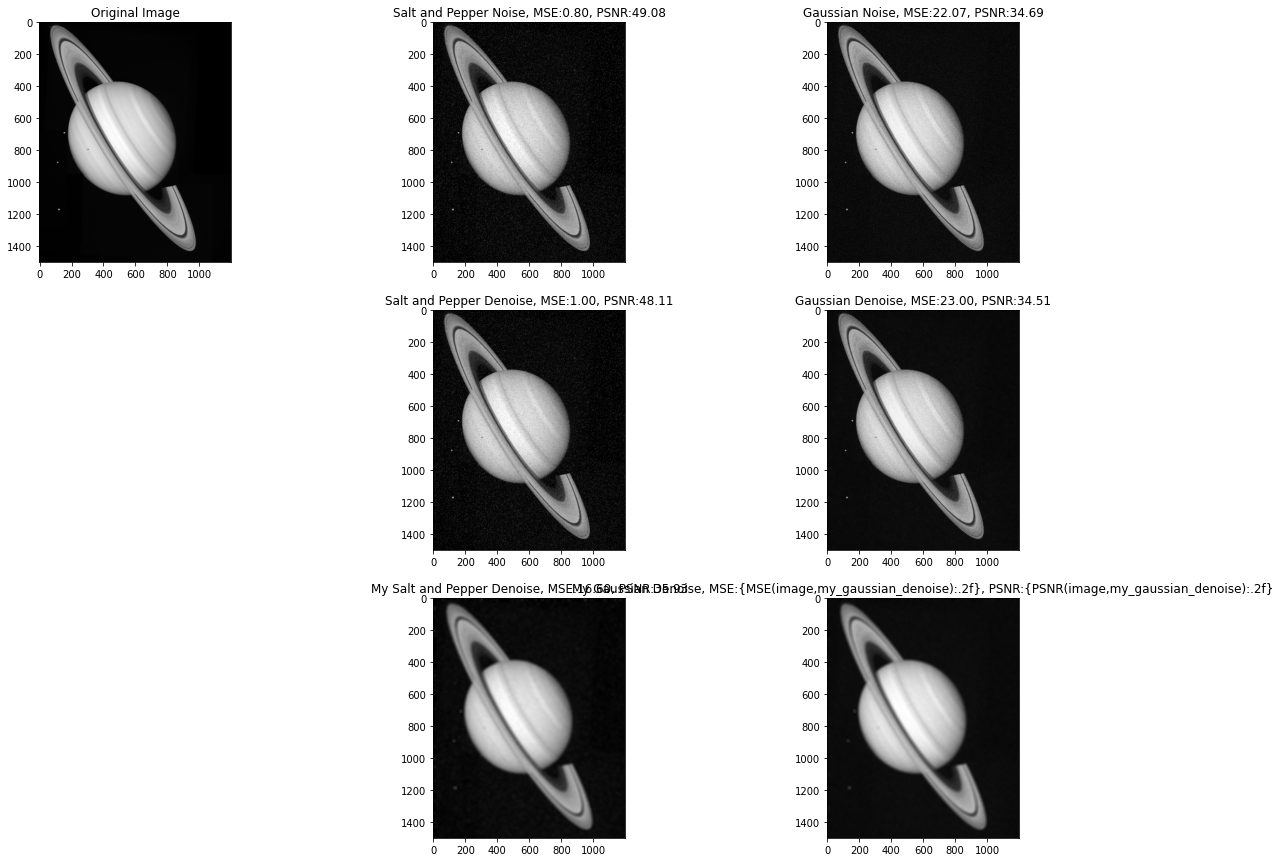

In [ ]:
#@title Grader { vertical-output: true, display-mode: "form" }
image_number = 8 #@param {type:"slider", min:1, max:10, step:1}
salt_and_paper_h =   10#@param {type:"integer"}
gaussian_h =         10#@param {type:"integer"}
 
# Grader, please don't touch [Can run to check] [will be graded on an image decided later]
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
 
clear_output(wait=True)
 
 
denoiser                    = NLMeans()
image                       = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                       = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
salt_and_pepper_example     = noise_maker.example(image.copy(),mode="s&p")
gaussian_example            = noise_maker.example(image.copy(),mode="gaussian")
 
start = time.time()
 
salt_and_pepper_denoise     = denoiser.example(salt_and_pepper_example.copy(),h=salt_and_paper_h)
gaussian_denoise            = denoiser.example(gaussian_example.copy(),h=gaussian_h)
 
end = time.time()
print(f"(Inbuilt) Time taken: {end-start:.2f}s\n")
 
start = time.time()
 
my_salt_and_pepper_denoise  = denoiser.solve(salt_and_pepper_example.copy(),h=salt_and_paper_h)
my_gaussian_denoise         = denoiser.solve(gaussian_example.copy(),h=gaussian_h)
 
end = time.time()
print(f"(My function) Time taken: {end-start:.2f}s\n")
 
print("Statistics:")
print(f"salt_and_paper_h: {salt_and_paper_h} , gaussian_h: {gaussian_h}\n")
print(f"Noisy   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Noisy   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"Skimage => SNP -> PSNR: {PSNR(salt_and_pepper_denoise,image):.2f} | MSE: {MSE(salt_and_pepper_denoise,image):.2f}")
print(f"Skimage => GSN -> PSNR: {PSNR(gaussian_denoise,image):.2f} | MSE: {MSE(gaussian_denoise,image):.2f}")
print(f"My Func => SNP -> PSNR: {PSNR(my_salt_and_pepper_denoise,image):.2f} | MSE: {MSE(my_salt_and_pepper_denoise,image):.2f}")
print(f"My Func => GSN -> PSNR: {PSNR(my_gaussian_denoise,image):.2f} | MSE: {MSE(my_gaussian_denoise,image):.2f}\n")
 
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
show_gray(image,"Original Image")
plt.subplot(3,3,2)
show_gray(salt_and_pepper_example,
          f"Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_example):.2f}, PSNR:{PSNR(image,salt_and_pepper_example):.2f}")
plt.subplot(3,3,3)
show_gray(gaussian_example,
          f"Gaussian Noise, MSE:{MSE(image,gaussian_example):.2f}, PSNR:{PSNR(image,gaussian_example):.2f}")
plt.subplot(3,3,5)
show_gray(salt_and_pepper_denoise,
          f"Salt and Pepper Denoise, MSE:{MSE(image,salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,salt_and_pepper_denoise):.2f}")
plt.subplot(3,3,6)
show_gray(gaussian_denoise,
          f"Gaussian Denoise, MSE:{MSE(image,gaussian_denoise):.2f}, PSNR:{PSNR(image,gaussian_denoise):.2f}")
plt.subplot(3,3,8)
show_gray(my_salt_and_pepper_denoise,
          f"My Salt and Pepper Denoise, MSE:{MSE(image,my_salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,my_salt_and_pepper_denoise):.2f}")
plt.subplot(3,3,9)
show_gray(my_gaussian_denoise,
          f"My Gaussian Denoise, MSE:{MSE(image,my_gaussian_denoise):.2f}, PSNR:{PSNR(image,my_gaussian_denoise):.2f}")
plt.show()

# Gaussian Filtering Comparison

***Objective:*** Show comparison between NL Means denoising and Gaussian Denoising.  

In [ ]:
class GaussianFilter():
  """
  
  """

  def solve(self, img, ksize=(5,5), sigma_x=0):
    """
    Solve function to perform gaussian filtering.

    :param img: noisy image
    :param ksize: representing the size of the kernel.
    :param sigma_x: standard deviation in X direction
    :rtype: uint8 (w,h)
    :return: solved image
    """
    
    # using cv2 syntax
    gaussian = cv2.GaussianBlur(img, ksize, sigma_x)
    return gaussian

(Inbuilt) Time taken: 1.03s

(My function) Time taken: 77.18s

(Gaussian denoise) Time taken: 0.01s

Statistics:
salt_and_paper_h: 10 , gaussian_h: 10

Noisy   => SNP -> PSNR: 45.58 | MSE: 1.80
Noisy   => GSN -> PSNR: 33.16 | MSE: 31.38
Skimage => SNP -> PSNR: 44.36 | MSE: 2.38
Skimage => GSN -> PSNR: 33.17 | MSE: 31.36
My Func => SNP -> PSNR: 32.69 | MSE: 34.98
My Func => GSN -> PSNR: 32.70 | MSE: 34.95

My GD => SNP -> PSNR: 34.78 | MSE: 21.64
My GD => GSN -> PSNR: 34.73 | MSE: 21.88



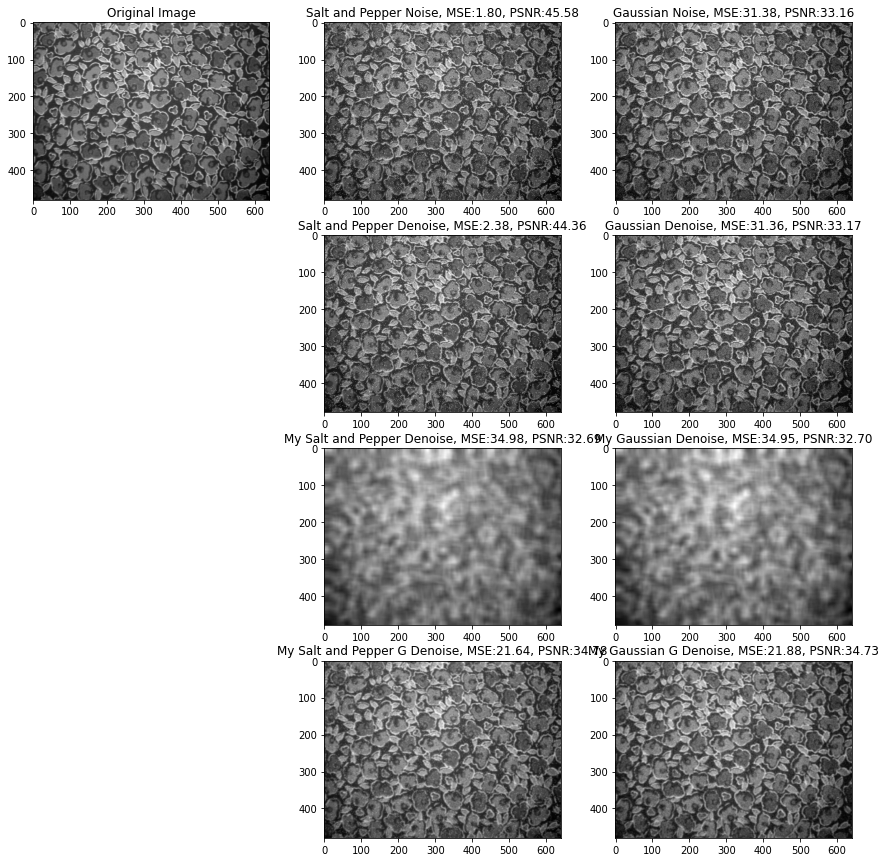

In [ ]:
#@title Final Comparision of Denoising Methods{ vertical-output: true, display-mode: "form" }
image_number = 10 #@param {type:"slider", min:1, max:10, step:1}
salt_and_paper_h =   10#@param {type:"integer"}
gaussian_h =         10#@param {type:"integer"}
 
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
 
clear_output(wait=True)
 
 
denoiser                    = NLMeans()
image                       = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                       = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
salt_and_pepper_example     = noise_maker.example(image.copy(),mode="s&p")
gaussian_example            = noise_maker.example(image.copy(),mode="gaussian")
 
start = time.time()
 
salt_and_pepper_denoise     = denoiser.example(salt_and_pepper_example.copy(),h=salt_and_paper_h)
gaussian_denoise            = denoiser.example(gaussian_example.copy(),h=gaussian_h)
 
end = time.time()
print(f"(Inbuilt) Time taken: {end-start:.2f}s\n")


# nlm solve function
start = time.time()
 
my_salt_and_pepper_denoise  = denoiser.solve(salt_and_pepper_example.copy(),h=salt_and_paper_h)
my_gaussian_denoise         = denoiser.solve(gaussian_example.copy(),h=gaussian_h)
 
end = time.time()
print(f"(My function) Time taken: {end-start:.2f}s\n")

# Gaussian denoising
gf                          = GaussianFilter()
start = time.time()
 
my_salt_and_pepper_gaussiandenoise  = gf.solve(salt_and_pepper_example.copy())
my_gaussian_gaussiandenoise         = gf.solve(gaussian_example.copy())
 
end = time.time()
print(f"(Gaussian denoise) Time taken: {end-start:.2f}s\n")
 
print("Statistics:")
print(f"salt_and_paper_h: {salt_and_paper_h} , gaussian_h: {gaussian_h}\n")
print(f"Noisy   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Noisy   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"Skimage => SNP -> PSNR: {PSNR(salt_and_pepper_denoise,image):.2f} | MSE: {MSE(salt_and_pepper_denoise,image):.2f}")
print(f"Skimage => GSN -> PSNR: {PSNR(gaussian_denoise,image):.2f} | MSE: {MSE(gaussian_denoise,image):.2f}")
print(f"My Func => SNP -> PSNR: {PSNR(my_salt_and_pepper_denoise,image):.2f} | MSE: {MSE(my_salt_and_pepper_denoise,image):.2f}")
print(f"My Func => GSN -> PSNR: {PSNR(my_gaussian_denoise,image):.2f} | MSE: {MSE(my_gaussian_denoise,image):.2f}\n")
print(f"My GD => SNP -> PSNR: {PSNR(my_salt_and_pepper_gaussiandenoise,image):.2f} | MSE: {MSE(my_salt_and_pepper_gaussiandenoise,image):.2f}")
print(f"My GD => GSN -> PSNR: {PSNR(my_gaussian_gaussiandenoise,image):.2f} | MSE: {MSE(my_gaussian_gaussiandenoise,image):.2f}\n")


plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
show_gray(image,"Original Image")
plt.subplot(4,4,2)
show_gray(salt_and_pepper_example,
          f"Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_example):.2f}, PSNR:{PSNR(image,salt_and_pepper_example):.2f}")
plt.subplot(4,4,3)
show_gray(gaussian_example,
          f"Gaussian Noise, MSE:{MSE(image,gaussian_example):.2f}, PSNR:{PSNR(image,gaussian_example):.2f}")
plt.subplot(4,4,6)
show_gray(salt_and_pepper_denoise,
          f"Salt and Pepper Denoise, MSE:{MSE(image,salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,salt_and_pepper_denoise):.2f}")
plt.subplot(4,4,7)
show_gray(gaussian_denoise,
          f"Gaussian Denoise, MSE:{MSE(image,gaussian_denoise):.2f}, PSNR:{PSNR(image,gaussian_denoise):.2f}")
plt.subplot(4,4,10)
show_gray(my_salt_and_pepper_denoise,
          f"My Salt and Pepper Denoise, MSE:{MSE(image,my_salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,my_salt_and_pepper_denoise):.2f}")
plt.subplot(4,4,11)
show_gray(my_gaussian_denoise,
          f"My Gaussian Denoise, MSE:{MSE(image,my_gaussian_denoise):.2f}, PSNR:{PSNR(image,my_gaussian_denoise):.2f}")
plt.subplot(4,4,14)
show_gray(my_salt_and_pepper_gaussiandenoise,
          f"My Salt and Pepper G Denoise, MSE:{MSE(image,my_salt_and_pepper_gaussiandenoise):.2f}, PSNR:{PSNR(image,my_salt_and_pepper_gaussiandenoise):.2f}")
plt.subplot(4,4,15)
show_gray(my_gaussian_gaussiandenoise,
          f"My Gaussian G Denoise, MSE:{MSE(image,my_gaussian_gaussiandenoise):.2f}, PSNR:{PSNR(image,my_gaussian_gaussiandenoise):.2f}")
plt.show()

